# 3- Project 
## Using Deep learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pr_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Exploratory Data Analysis 
##### Check for missing values

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


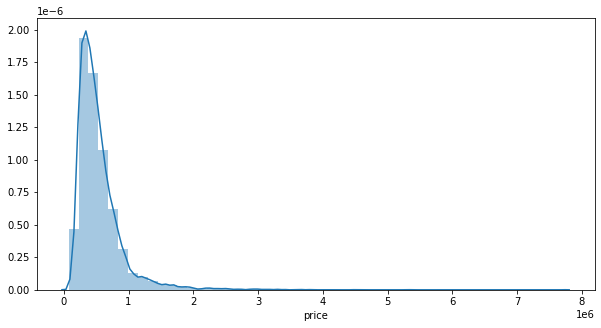

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'])

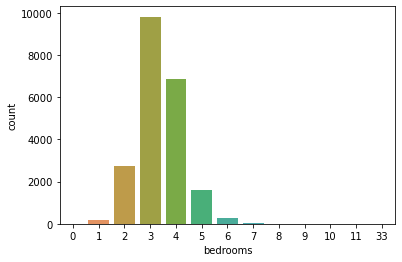

In [6]:
sns.countplot(df['bedrooms'])

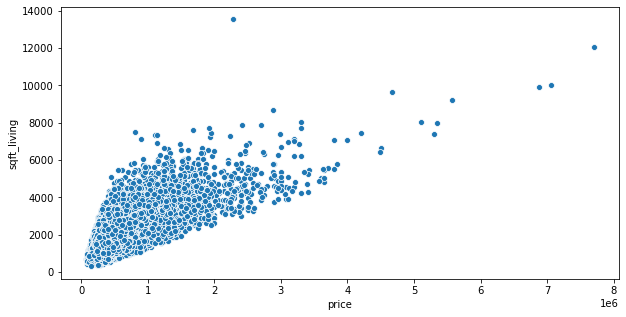

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

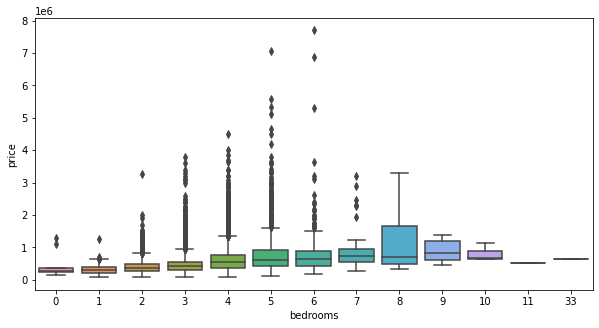

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms',y='price',data=df)

#### Feature Engineering

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

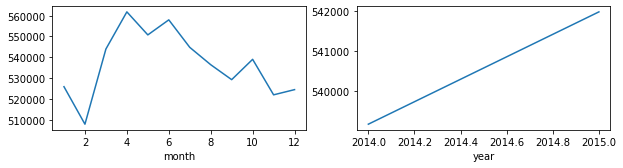

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(2, 2, 1)
df.groupby('month').mean()['price'].plot()

plt.subplot(2, 2, 2)
df.groupby('year').mean()['price'].plot()

In [11]:
df = df.drop('date',axis=1)
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [12]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [13]:
df = df.drop('zipcode',axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


#### Scaling and Train Test Split

In [14]:
X = df.drop('price',axis=1)
y = df['price']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(15129, 20)
(6484, 20)


####  Building the model

In [16]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

#### Uesing Lib tensorflow & keras

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

#### Training Model

In [19]:
m = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=128,
              epochs=600)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 15129 samples, validate on 6484 samples
Epoch 1/600
15129/15129 [==============================] - 2s 100us/sample - loss: 416971820334.4824 - val_loss: 360874283541.1623
Epoch 2/600
15129/15129 [==============================] - 0s 23us/sample - loss: 137146306610.6281 - val_loss: 102422068166.5145
Epoch 3/600
15129/15129 [==============================] - 0s 20us/sample - loss: 93114419563.7369 - val_loss: 90854678745.3078
Epoch 4/600
15129/15129 [==============================] - 0s 20us/sample - loss: 81960503292.3450 - val_loss: 76964141926.4948
Epoch 5/600
15129/15129 [==============================] - 0s 20us/sample - loss: 68803151071.4268 - val_loss: 63960305317.8236
Epoch 6/600
15129/15129 [==============================] - 0s 20us/sample - loss: 58332092112.0962 - val_loss: 54323049461.2609
Epoch 7/600
15129/15129 [==============================] - 0s 24us/sample - loss: 53978793717.864

15129/15129 [==============================] - 0s 19us/sample - loss: 18610868659.4149 - val_loss: 17805188691.7014
Epoch 125/600
15129/15129 [==============================] - 0s 20us/sample - loss: 18846113318.1403 - val_loss: 17844301889.0660
Epoch 126/600
15129/15129 [==============================] - 0s 20us/sample - loss: 18904789054.8113 - val_loss: 17821557015.2153
Epoch 127/600
15129/15129 [==============================] - 0s 20us/sample - loss: 17967165419.0855 - val_loss: 18104943257.8211
Epoch 128/600
15129/15129 [==============================] - 0s 28us/sample - loss: 18990290646.2555 - val_loss: 18039499849.9099
Epoch 129/600
15129/15129 [==============================] - 0s 20us/sample - loss: 18197646998.5643 - val_loss: 18058741039.8519
Epoch 130/600
15129/15129 [==============================] - 0s 20us/sample - loss: 18844545646.0890 - val_loss: 17685338324.8859
Epoch 131/600
15129/15129 [==============================] - 0s 22us/sample - loss: 18352628756.2038 - v

15129/15129 [==============================] - 0s 21us/sample - loss: 14228982387.4361 - val_loss: 14420593127.3634
Epoch 251/600
15129/15129 [==============================] - 0s 22us/sample - loss: 14055195017.5181 - val_loss: 14233408760.2616
Epoch 252/600
15129/15129 [==============================] - 0s 20us/sample - loss: 14012335956.5888 - val_loss: 14774960023.1363
Epoch 253/600
15129/15129 [==============================] - 0s 20us/sample - loss: 13876736602.7989 - val_loss: 14713857421.9766
Epoch 254/600
15129/15129 [==============================] - 0s 20us/sample - loss: 13980097423.8467 - val_loss: 14977593757.1376
Epoch 255/600
15129/15129 [==============================] - 0s 20us/sample - loss: 13890908659.9183 - val_loss: 14124707650.1715
Epoch 256/600
15129/15129 [==============================] - 0s 21us/sample - loss: 13859948709.9287 - val_loss: 15063768347.0056
Epoch 257/600
15129/15129 [==============================] - 0s 21us/sample - loss: 13964903529.1142 - v

15129/15129 [==============================] - 0s 20us/sample - loss: 13445818456.5314 - val_loss: 15095891023.5953
Epoch 377/600
15129/15129 [==============================] - 0s 19us/sample - loss: 12979134765.1287 - val_loss: 14664797594.6107
Epoch 378/600
15129/15129 [==============================] - 0s 20us/sample - loss: 12965897081.9845 - val_loss: 14584888787.4645
Epoch 379/600
15129/15129 [==============================] - 0s 20us/sample - loss: 12783027905.9502 - val_loss: 14955337887.1906
Epoch 380/600
15129/15129 [==============================] - 0s 20us/sample - loss: 12917243096.8952 - val_loss: 15401381150.7958
Epoch 381/600
15129/15129 [==============================] - 0s 20us/sample - loss: 12902031298.9485 - val_loss: 14966212245.3991
Epoch 382/600
15129/15129 [==============================] - 0s 20us/sample - loss: 12548742650.8898 - val_loss: 14909071147.7458
Epoch 383/600
15129/15129 [==============================] - 0s 20us/sample - loss: 13232172643.0564 - v

15129/15129 [==============================] - 0s 20us/sample - loss: 12083169117.7262 - val_loss: 15863932751.4374
Epoch 503/600
15129/15129 [==============================] - 0s 20us/sample - loss: 11871294156.4751 - val_loss: 16387905518.9439
Epoch 504/600
15129/15129 [==============================] - 0s 20us/sample - loss: 11980151958.3274 - val_loss: 15300753492.6490
Epoch 505/600
15129/15129 [==============================] - 0s 20us/sample - loss: 12077891027.1928 - val_loss: 15430870095.5953
Epoch 506/600
15129/15129 [==============================] - 0s 20us/sample - loss: 12008609757.6162 - val_loss: 15953852235.3313
Epoch 507/600
15129/15129 [==============================] - 0s 19us/sample - loss: 12229542359.8292 - val_loss: 15796455195.9531
Epoch 508/600
15129/15129 [==============================] - 0s 20us/sample - loss: 12410762444.5090 - val_loss: 16662037326.4898
Epoch 509/600
15129/15129 [==============================] - 0s 20us/sample - loss: 12166686737.4626 - v

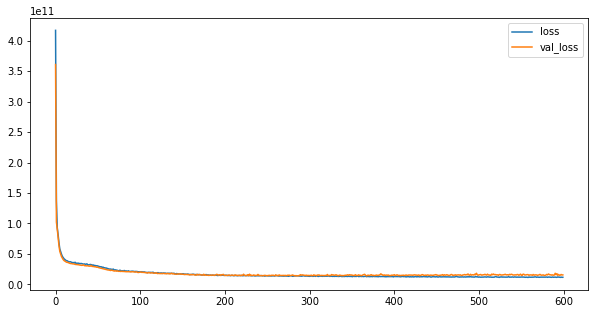

In [20]:
plt.figure(figsize=(10, 5))

plt.plot(m.history['loss'], label='loss')
plt.plot(m.history['val_loss'], label='val_loss')
plt.legend()

#### Evaluation the test

In [21]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:  62713.24067498678
MSE:  9537743729.819374
RMSE:  97661.3727623126
R2 Square:  0.9279729049008396
=========Testing Result=======
MAE:  69252.06437239744
MSE:  15686818792.309347
RMSE:  125247.03107183558
R2 Square:  0.8881708802772715


# Good luck
## Yasir Hussein Shakir
## E : Yasserhesseinshakir@yahoo.com
## T : +9647905767055